In [1]:
import librerias.explicador as Expl
import librerias.recomendador as Rec
import librerias.util as util
import pandas as pd
import json
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.axes as maxes
import pickle
import random 

# Entrenamiento

In [2]:
nmf = Rec.Recomendador()
df = util.leer_dataset("Datasets/dataset.csv")
trainset, test_data = nmf.dividir_dataset(df, 0.2)
W = nmf.entrenamiento(26)

# Recomendación

In [158]:
uid = 26850
g1 = nmf.get_recomendados(uid, 1)

# Explicaciones

## Juegos similares

In [159]:
expl = Expl.Explicaciones(nmf)
q_u = expl.get_qu(uid)
items_similares = expl.get_k_expl(g1[0],uid, 10)

## Extracción de explicaciones

In [160]:
nombres_juegos_age, nombres_juegos_players, edad, jugadores = expl.explain_age_best_players(g1[0], items_similares, 4)

In [161]:
faciles, dificiles, igual, info_recommended = expl.explain_dificultad(g1[0], uid, items_similares, 4)

In [162]:
items_tipo, items_categ, items_mechanism, tipos, categs, mechs = expl.explain_mecanicas(g1[0], items_similares, 4)

## Presentación de explicaciones 

###  Edad recomendada

Los juegos con la misma  edad recomendada (12 años):


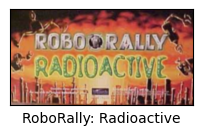

In [163]:
if nombres_juegos_age:
    img_array = []
    titulos_array = []

    for x in range(0, len(nombres_juegos_age)):
        imgBGR = cv2.imread("imagenes_games/"+nombres_juegos_age[x]+".jpeg")
        imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
        img_array.append(imgRGB)
        titulos_array.append(nombres_juegos_age[x])
        plt.subplot(2, 4, x + 1)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(titulos_array[x])
        plt.imshow(img_array[x], cmap='gray', interpolation='bicubic')
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=1.5, 
                        top=0.9, 
                        wspace=0.3, 
                        hspace=0.4)
    print("Los juegos con la misma  edad recomendada ({} años):".format(edad))
    plt.show()

### Número de jugadores 

In [164]:
if nombres_juegos_players:
    img_array = []
    titulos_array = []

    for x in range(0, len(nombres_juegos_players)):
        imgBGR = cv2.imread("imagenes_games/"+nombres_juegos_players[x]+".jpeg")
        imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
        img_array.append(imgRGB)
        titulos_array.append(nombres_juegos_players[x])
        plt.subplot(2, 4, x + 1)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(titulos_array[x])
        plt.imshow(img_array[x], cmap='gray', interpolation='bicubic')
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=1.5, 
                        top=0.9, 
                        wspace=0.3, 
                        hspace=0.4)
    print("Los juegos con el mismo número de jugadores recomendado ({} jugadores):".format(jugadores))
    plt.show()

### Dificultad

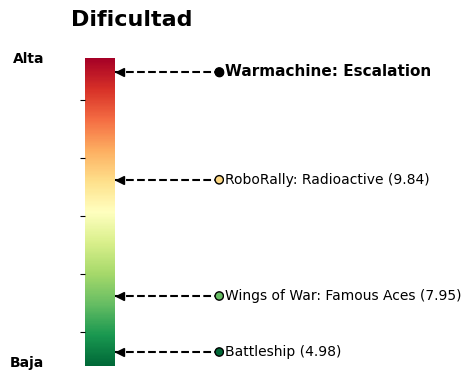

In [168]:
dificultades = {"peso":[], "nombres":[], "ids":[], "ratings": []}
x = []
if faciles["faciles"]:
    i= 1
    for item in faciles["faciles"]:
        dificultades["peso"].append(item["aweight"])
        dificultades["nombres"].append(item["nombre"])
        dificultades["ids"].append(item["id"])
        dificultades["ratings"].append(item["rating"])
        x.append(0)
        i += 1
            
if dificiles["dificiles"]:
    i= 1
    for item in dificiles["dificiles"]:
        dificultades["peso"].append(item["aweight"])
        dificultades["nombres"].append(item["nombre"])
        dificultades["ids"].append(item["id"])
        dificultades["ratings"].append(item["rating"])
        x.append(0)
        i += 1
            
if igual["iguales"]:
    i= 1
    for item in igual["iguales"]:
        dificultades["peso"].append(item["aweight"])
        dificultades["nombres"].append(item["nombre"])
        dificultades["ids"].append(item["id"])
        dificultades["ratings"].append(item["rating"])
        x.append(0)
        i += 1
dificultades["peso"].append(info_recommended.iloc[0,11])
x.append(0)

# DIBUJO
x0 = [0]
y0 = [info_recommended.iloc[0,11]]
fig, ax = plt.subplots(figsize=(1.8, 4), dpi=100)
ax.text(-0.1, 0.86, "Alta", va='bottom', ha='right', fontsize=10,fontweight="bold",
                transform=fig.transFigure)
ax.text(-0.1, 0.1, "Baja", va='bottom', ha='right', fontsize=10,fontweight="bold",
                transform=fig.transFigure)
cm1 = plt.colormaps['RdYlGn_r'] 
sc1 = plt.scatter(x, dificultades["peso"],c=dificultades["peso"],cmap=cm1, edgecolor='black')
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size=0.3, pad = 0, pack_start=True)
cbar = fig.colorbar(sc1, cax=cax, spacing='proportional')  
plt.scatter(x0, y0, color='black')
plt.suptitle("Dificultad",
             horizontalalignment = 'left',
             x=0.05,
             y=1,
             transform=fig.transFigure,
             fontsize=16,
             fontweight="bold")
# recomendado
ax.plot(-0.1,info_recommended.iloc[0,11], marker ="<", color="black")
ax.axhline(y=info_recommended.iloc[0,11], xmin=0, xmax=0.92, color="black", linestyle ="--")
plt.annotate(info_recommended.iloc[0,1], (0.0055, info_recommended.iloc[0,11]-0.04), fontsize=11,fontweight="bold")
dificultades['peso'].remove(info_recommended.iloc[0,11])

# el resto de juegos, los similares
for i in range(len(dificultades["peso"])):
    ax.plot(-0.1, dificultades["peso"][i], marker ="<", color="black")
    plt.annotate(dificultades["nombres"][i]+" ("+str(round(dificultades["ratings"][i],2)) +")",
    (0.0055, dificultades["peso"][i]-0.04), fontsize=10)
    ax.axhline(y=dificultades["peso"][i], xmin=0, xmax=0.92, color="black", linestyle ="--")
    
plt.axis('off')
cbar.outline.set_visible(False)
cax.yaxis.set_ticks_position('left')
cax.yaxis.set_tick_params(labelleft=False)
fig.add_axes(cax)
plt.show()

### Tipos, categorías y mecánicas

Los siguientes juegos son parecidos a 'Warmachine: Escalation' en:

Tipo - Wargames


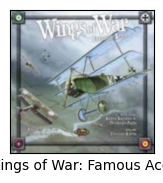

Categoría - Expansion for Base-game


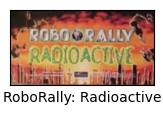

Categoría - Wargame


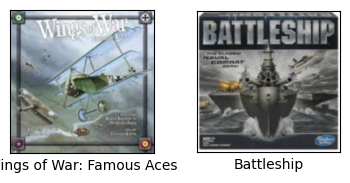

In [166]:
print("Los siguientes juegos son parecidos a \'"+ info_recommended.iloc[0,1]+"\' en:\n")
if items_tipo:
    for tipo in tipos:
        if tipo in items_tipo.keys():
            nombres_juegos_tipo = []
            
            print('\033[1m' +"Tipo - "+'\033[0m'+tipo)
            i= 1
            for item in items_tipo[tipo]:
                nombres_juegos_tipo.append(item)
                i += 1
            if nombres_juegos_tipo:
                img_array = []
                titulos_array = []

                for x in range(0, len(nombres_juegos_tipo)):
                    imgBGR = cv2.imread("imagenes_games/"+nombres_juegos_tipo[x]+".jpeg")
                    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
                    img_array.append(imgRGB)
                    titulos_array.append(nombres_juegos_tipo[x])
                    plt.subplot(2, 4, x + 1)
                    plt.xticks([])
                    plt.yticks([])
                    plt.xlabel(titulos_array[x])
                    plt.imshow(img_array[x], cmap='gray', interpolation='bicubic')
                plt.subplots_adjust(left=0.2,
                                    bottom=0.1, 
                                    right=1.3, 
                                    top=0.9, 
                                    wspace=0.3, 
                                    hspace=0.4)

                plt.show()
            
if items_categ:
    for categ in categs:
        if categ in items_categ.keys():
            nombres_juegos_categ = []
            print('\033[1m' +"Categoría - "+'\033[0m'+categ)
            i= 1
            for item in items_categ[categ]:
                nombres_juegos_categ.append(item)
                i += 1
            if nombres_juegos_categ:
                img_array = []
                titulos_array = []

                for x in range(0, len(nombres_juegos_categ)):
                    imgBGR = cv2.imread("imagenes_games/"+nombres_juegos_categ[x]+".jpeg")
                    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
                    img_array.append(imgRGB)
                    titulos_array.append(nombres_juegos_categ[x])
                    plt.subplot(2, 4, x + 1)
                    plt.xticks([])
                    plt.yticks([])
                    plt.xlabel(titulos_array[x])
                    plt.imshow(img_array[x], cmap='gray', interpolation='bicubic')
                plt.subplots_adjust(left=0.2,
                                    bottom=0.1, 
                                    right=1.3, 
                                    top=0.9, 
                                    wspace=0.3, 
                                    hspace=0.4)

                plt.show()
                
if items_mechanism:
    for mechanism in mechs:
        if mechanism in items_mechanism.keys():
            nombres_juegos_mech = []
            print('\033[1m' +"Mecánica - "+'\033[0m'+mechanism)
            i= 1
            for item in items_mechanism[mechanism]:
                nombres_juegos_mech.append(item)
                i += 1
            if nombres_juegos_mech:
                img_array = []
                titulos_array = []

                for x in range(0, len(nombres_juegos_mech)):
                    imgBGR = cv2.imread("imagenes_games/"+nombres_juegos_mech[x]+".jpeg")
                    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
                    img_array.append(imgRGB)
                    titulos_array.append(nombres_juegos_mech[x])
                    plt.subplot(2, 4, x + 1)
                    plt.xticks([])
                    plt.yticks([])
                    plt.xlabel(titulos_array[x])
                    plt.imshow(img_array[x], cmap='gray', interpolation='bicubic')
                plt.subplots_adjust(left=0.2,
                                    bottom=0.1, 
                                    right=1.3, 
                                    top=0.9, 
                                    wspace=0.3, 
                                    hspace=0.4)

                plt.show()